# **Machine Learning**

From Udemy course '**Learning Phyton for Data Analysis and Visualization**' by Jose Portilla

### **6. Decision Trees and Random Forests**

In [4]:
import numpy as np
import pandas as pd
from pandas import Sberies, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns. set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import make_blobs

In [30]:
X, y = make_blobs(n_samples=500, centers=4,
                  random_state=8, cluster_std=2.4)

**Scatter plot the points!**

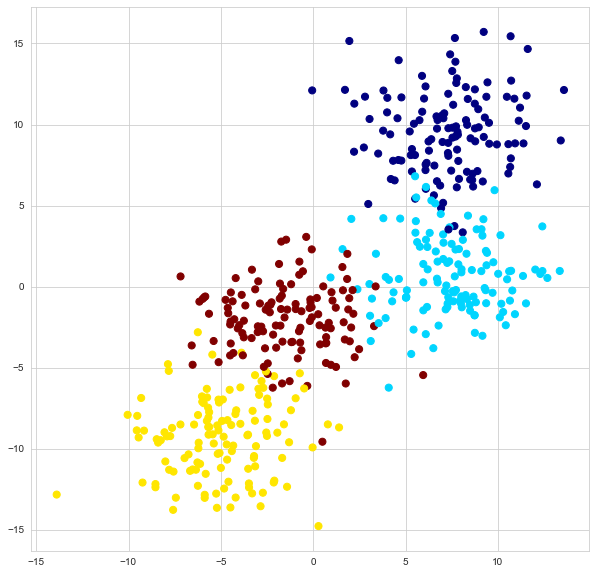

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [10]:
from sklearn.tree import DecisionTreeClassifier

**Visualization Function of Decision Tree!**

In [36]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    classifier.fit(X, y)  # Fit the X and y data to the tree
    if xlim is None:  # set the x and y limits to the data (+/- 0.1)
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    def plot_boundaries(i, xlim, ylim):  # Plots the Decision Boundaries
        if i < 0:
            return
        tree = classifier.tree_  # Shorter variable name
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

**Set model variable!**

In [37]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

**Show Boundaries!**

C:\Users\husey\AppData\Local\Temp/ipykernel_10636/1595162025.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


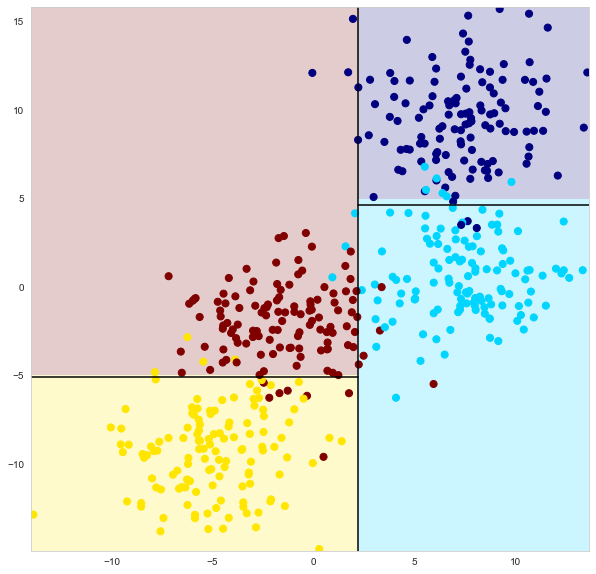

In [38]:
visualize_tree(clf,X,y)

**Set model variable!**

In [14]:
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

**Show Boundaries!**

C:\Users\husey\AppData\Local\Temp/ipykernel_10636/1595162025.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


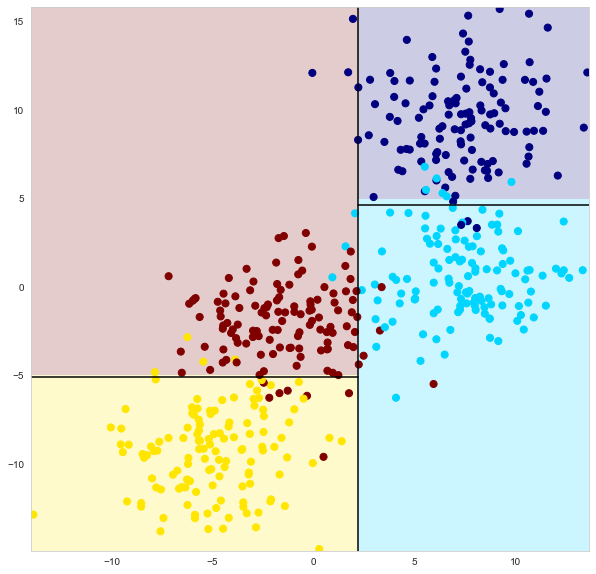

In [39]:
visualize_tree(clf,X,y)

**Random Forests!**

In [40]:
from sklearn.ensemble import RandomForestClassifier

**n_estimators!**

In [ ]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)

**Get rid of boundaries to avoid error!**

In [ ]:
visualize_tree(clf,X,y,boundaries=False)

**Import ensemble.RandomForestRegressor**

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = 10 * np.random.rand(100)

**This function generates random sinusoidal data for reg.analysis!**

In [48]:
def sin_model(x, sigma=0.2):
    noise = sigma * np.random.randn(len(x))
    return np.sin(5 * x) + np.sin(0.5 * x) + noise

**Call y for data with x !**

In [ ]:
y = sin_model(x)

**Plot x vs y !**

<ErrorbarContainer object of 3 artists>

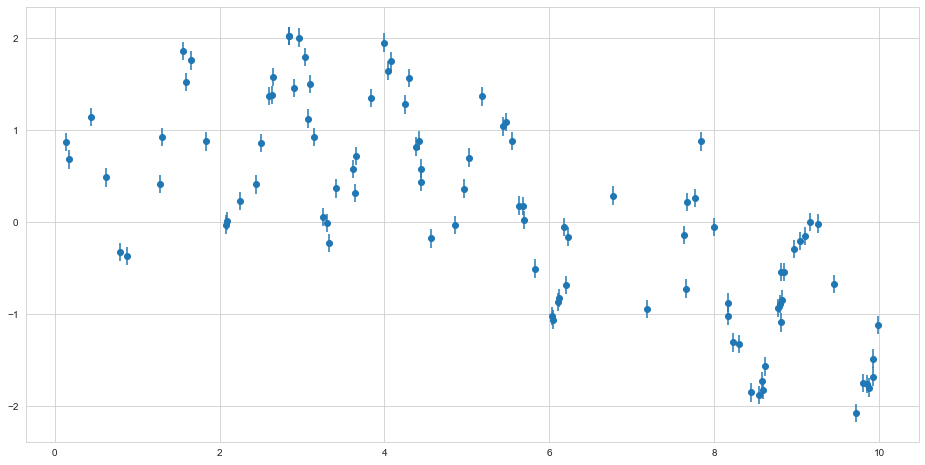

In [51]:
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

**X points !**

In [52]:
xfit = np.linspace(0, 10, 1000)

**Model !**

In [53]:
rfr = RandomForestRegressor(100)

**Fit Model (Format array for y with [:,None]) !**

In [54]:
rfr.fit(x[:, None], y)

RandomForestRegressor()

**Set predicted points !**

In [55]:
yfit = rfr.predict(xfit[:, None])

**Set real poitns (the model function) !**

In [56]:
ytrue = sin_model(xfit, 0)

**Plot !**

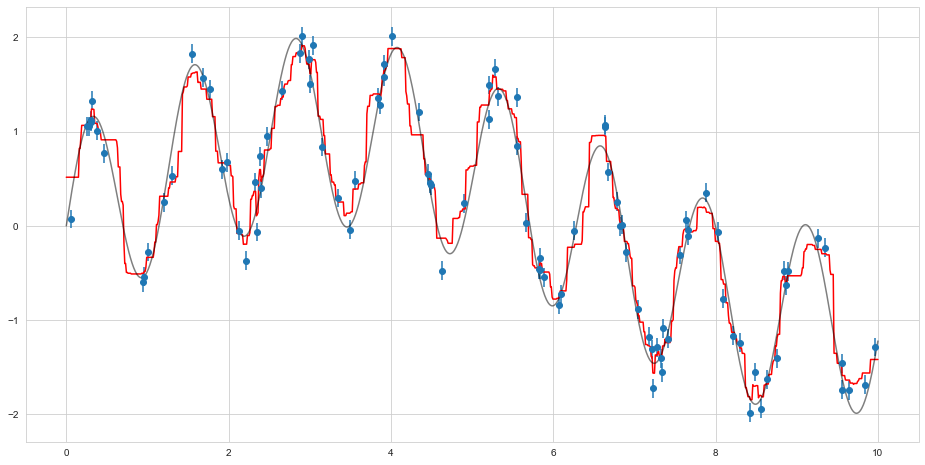

In [29]:
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);